<a href="https://colab.research.google.com/github/GouravRohit/Python-Notebook/blob/main/Sample_Project_ML_Submission_Template_(Gourav_Rohit).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Unsupervised ML - Myntra Online Retail Customer Segmentation
##### ***Contribution***    - **GOURAV ROHIT**


# **Project Summary -**

**Myntra** is a leading Indian fashion e-commerce company known for its wide range of clothing, accessories, and lifestyle products. While Myntra is recognized primarily for fashion, this dataset relates to the company's online retail operations for Myntra Gifts Ltd., a UK-based division specializing in unique all-occasion giftware. This dataset spans transactions from December 1, 2009, to December 9, 2011, and includes detailed records of sales made through Myntra Gifts Ltd.’s non-store online platform. The dataset provides a thorough snapshot of the company's international online retail activities during this period.

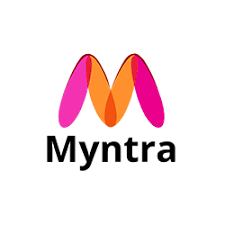

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Purpose**:

The primary purpose of analyzing this dataset is to extract valuable insights to enhance Myntra Gifts Ltd.'s business strategies. Specific goals include:

1. *Identifying Purchasing Trends*: Understanding patterns in customer purchases over time, including seasonal trends and product preferences, to better align inventory and marketing strategies.

2. *Evaluating Product Performance*: Assessing which products are most and least popular to optimize product offerings and make informed decisions about stock management and new product introductions.

3. *Understanding Customer Behavior*: Analyzing customer buying habits, frequency of purchases, and geographic distribution to tailor marketing efforts and improve customer segmentation.

4. *Optimizing Pricing Strategies*: Evaluating the relationship between unit prices and sales volume to refine pricing models and maximize revenue while ensuring competitive pricing.

5. *Streamlining Inventory Management*: Using sales and demand data to enhance inventory planning, reduce instances of overstock and stockouts, and improve overall inventory efficiency.

**Project Type - *Unsupervised ML (End to End Machine Learning)- Myntra Online Retail Customer Segmentation***

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import math from the standard math module
from math import sqrt # Changed from 'from numpy import math'
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (r2_score,
mean_squared_error,  mean_absolute_percentage_error,
mean_absolute_error)
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Module project/module 6/capstone/Online Retail.xlsx - Online Retail.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### Dataset First View

In [4]:
# Dataset First Look
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
df.shape

(541909, 8)

### Dataset Information

In [7]:
# Dataset Info
print('The length of the data is ',len(df))
df.describe
df.info

The length of the data is  541909


<bound method DataFrame.info of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

          InvoiceDate  UnitPrice  CustomerID         Country  
0        12/1/10 8:26       2.55     17850.0  United Kingdom  
1        12/1/10 8:26       3.39     17850.0  United Kingdom  
2        12/1/10 8:26       2.75     17850.0  United Kingdom  
3        12/1/10 8:26       3.39     17850.0  United Kingdom  
4        12/1/10 8:26       3.39     17850.0  United Kingdom  
...               ...        ...         ...             ...  
541904  12/9/11 12:50       0.85     12680.0          France  
541905  12/9/11 12:50       2.10     12680.0          France  
541906  12/9/11 12:50       4.15     12680.0          France  
541907  12/9/11 12:50       4.15     12680.0          France  
541908  12/9/11 12:50       4.95     12680.0          France  

[541909 rows x 8 columns]>

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(5268)

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


<Axes: >

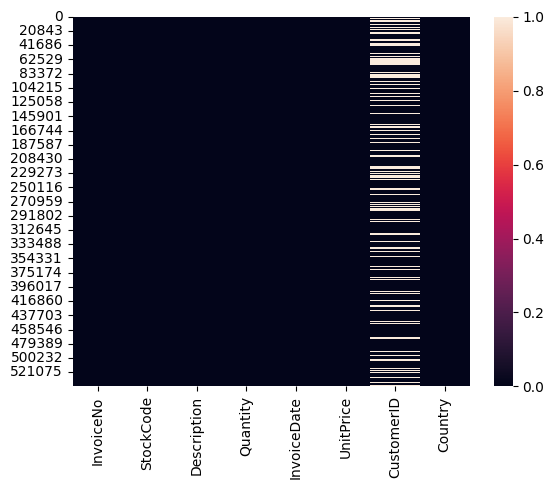

In [10]:
# Visualizing the missing values
sns.heatmap(df.isnull())

### What did you know about your dataset?

**Dataset Overview**
This dataset contains detailed transaction records from Myntra Gifts Ltd., a UK-based division of Myntra specializing in unique all-occasion giftware. The data spans from December 1, 2009, to December 9, 2011, capturing the company’s online retail operations during this period.

**Key Attributes of the Dataset:**

* Number of Records: 541,909 rows (transactions)

* Number of Features: 8 columns

**Features Description:**

* InvoiceNo: Unique transaction ID

* StockCode: Unique identifier for each product

* Description: Name or description of the product

* Quantity: Number of units sold in each transaction

* InvoiceDate: Date and time when the transaction occurred

* UnitPrice: Price per unit of the product

* CustomerID: Anonymized ID for the customer (missing in ~25% of the data)

* Country: Country where the customer is located

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [12]:
# Dataset Describe
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### Variables Description

| **Variable Name** | **Data Type**                                           | **Description**                                                                                                          |
| ----------------- | ------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------ |
| **InvoiceNo**     | *Object (String)*                                       | A unique 6-digit code assigned to each transaction. Transactions starting with “C” indicate cancellations.               |
| **StockCode**     | *Object (String)*                                       | A unique identifier assigned to each product/item sold.                                                                  |
| **Description**   | *Object (String)*                                       | Name or short description of the product. Some entries may be missing or inconsistent.                                   |
| **Quantity**      | *Integer*                                               | Number of units purchased for each product in the transaction. Negative values indicate returns.                         |
| **InvoiceDate**   | *Object (String → to be converted to Datetime)*         | Date and time when the transaction was generated (e.g., `12/1/10 8:26`). This field is crucial for time-series analysis. |
| **UnitPrice**     | *Float*                                                 | Price per unit of the product in GBP (£).                                                                                |
| **CustomerID**    | *Float → to be converted to Integer/String (if needed)* | Unique ID assigned to each customer. Missing for around 25% of entries. Helps in customer-level analysis.                |
| **Country**       | *Object (String)*                                       | Name of the country where the customer resides. Most transactions are from the United Kingdom.                           |


### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
df.nunique()

,0
InvoiceNo,25900
StockCode,4070
Description,4223
Quantity,722
InvoiceDate,23260
UnitPrice,1630
CustomerID,4372
Country,38


## 3. ***Data Wrangling***

### Data Wrangling Code

In [14]:
# Write your code to make your dataset analysis ready.
# Check the initial shape and data types
print("Initial dataset shape:", df.shape)
print(df.dtypes)

# Convert 'InvoiceDate' to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

# Drop rows with missing essential values (Description and InvoiceDate)
df.dropna(subset=['Description', 'InvoiceDate'], inplace=True)

# Remove rows with Quantity <= 0 or UnitPrice <= 0 (likely returns or incorrect entries)
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

# Convert 'CustomerID' to string to treat it as a categorical variable
df['CustomerID'] = df['CustomerID'].astype(str)

# Clean 'Description' text: remove whitespace and standardize to uppercase
df['Description'] = df['Description'].str.strip().str.upper()

# Add a new feature 'TotalPrice' = Quantity × UnitPrice (for revenue analysis)
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Reset index after cleaning
df.reset_index(drop=True, inplace=True)

# Check final cleaned dataset
print("Cleaned dataset shape:", df.shape)
df.head()


Initial dataset shape: (541909, 8)
InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object
Cleaned dataset shape: (530104, 9)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


### What all manipulations have you done and insights you found?



| Description |                                                                                                                             |
| ---- | -------------------------------------------------------------------------------------------------------------------------------------- |
| 1️  | **Converted `InvoiceDate` to datetime** to enable time-based analysis like monthly trends and seasonality.                             |
| 2️  | **Dropped rows with missing values** in critical fields like `Description` and `InvoiceDate` to ensure data integrity.                 |
| 3️  | **Filtered out invalid transactions** where `Quantity ≤ 0` or `UnitPrice ≤ 0`, as these likely represent returns or data errors.       |
| 4️  | **Converted `CustomerID` to string** so it can be treated as a categorical identifier instead of a numerical value.                    |
| 5️  | **Standardized `Description`** by removing extra spaces and converting to uppercase for consistency in grouping and counting products. |
| 6️  | **Created a `TotalPrice` column** by multiplying `Quantity` × `UnitPrice` to calculate revenue per line item.                          |
| 7️  | **Reset the DataFrame index** after cleaning for a clean and sequential row order.                                                     |


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### **Chart - 1** Monthly Sales Trend (Total Revenue per Month)
Purpose: Identify seasonality and sales trends.

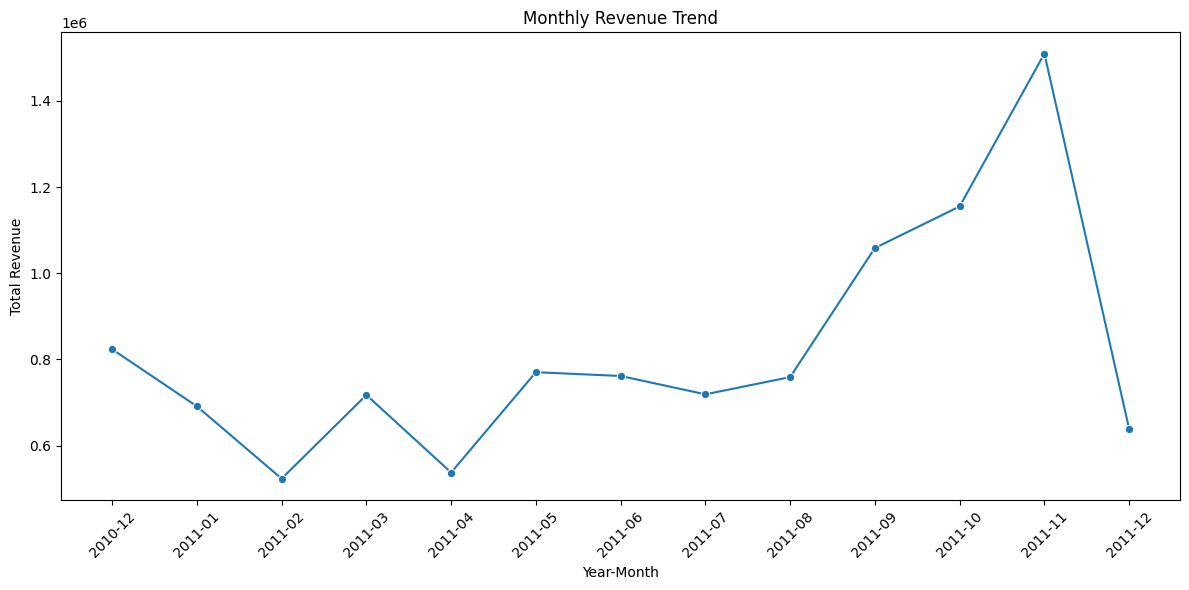

In [15]:
# Chart - 1 visualization code
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create YearMonth column
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

# Group by YearMonth and calculate total revenue
monthly_revenue = df.groupby('YearMonth')['TotalPrice'].sum().reset_index()

# Convert 'YearMonth' to string for plotting
monthly_revenue['YearMonth'] = monthly_revenue['YearMonth'].astype(str)

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_revenue, x='YearMonth', y='TotalPrice', marker='o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Year-Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

To identify sales patterns over time and observe any seasonality or growth/decline.

##### 2. What is/are the insight(s) found from the chart?

* Peaks in certain months indicate seasonal demand (e.g., around holidays).

* Flat or declining periods show low-demand cycles.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive:** Helps in forecasting demand and planning inventory/marketing ahead of peak seasons.

**Negative:** If sales decline over time, it may signal loss of customer interest or increased competition.

#### **Chart - 2** Top 10 Best-Selling Products by Quantity
**Purpose:** Find products that sell the most.

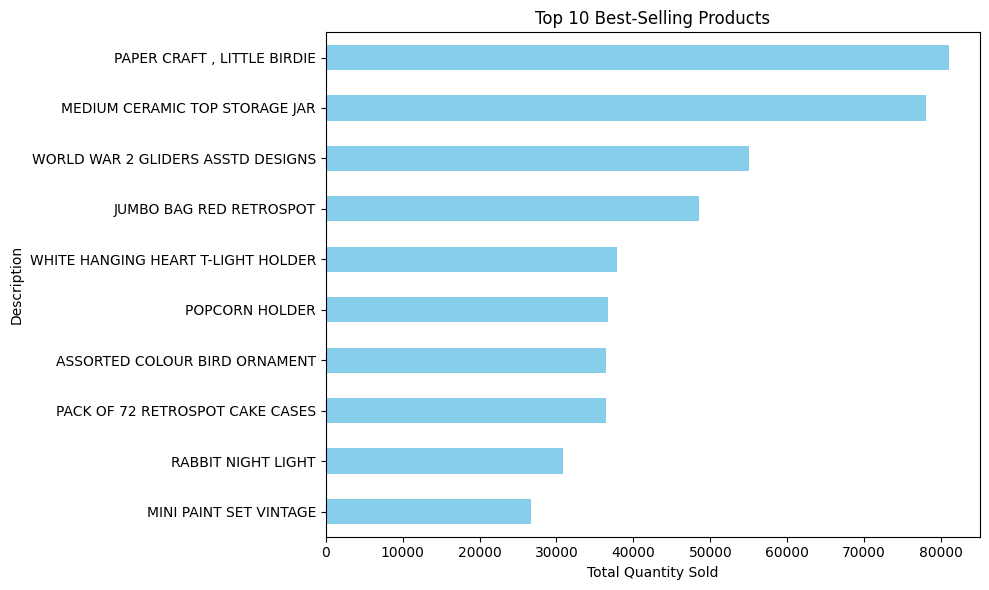

In [16]:
# Chart - 2 visualization code
top_products = df.groupby('Description')['Quantity'].sum().nlargest(10).sort_values(ascending=True)

plt.figure(figsize=(10, 6))
top_products.plot(kind='barh', color='skyblue')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Total Quantity Sold')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

To find which products contribute the most to overall sales in terms of quantity.

##### 2. What is/are the insight(s) found from the chart?

* A few products dominate sales → shows customer preferences.

* Long-tail products sell far less → potential for discontinuation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 **Positive:** Focus marketing, inventory, and upselling efforts on best-sellers.

 **Negative:** Overdependence on a few products increases business risk if demand for them drops.

#### **Chart - 3** Top Countries by Revenue
**Purpose:** See which countries bring in the most sales.

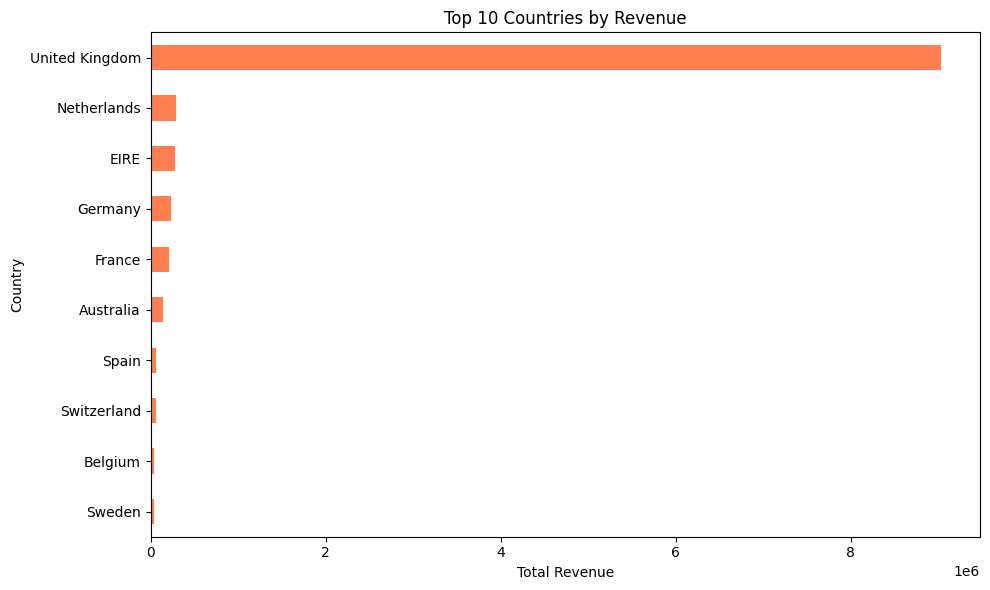

In [17]:
# Chart - 3 visualization code
top_countries = df.groupby('Country')['TotalPrice'].sum().nlargest(10).sort_values(ascending=True)

plt.figure(figsize=(10, 6))
top_countries.plot(kind='barh', color='coral')
plt.title('Top 10 Countries by Revenue')
plt.xlabel('Total Revenue')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

To assess geographic market performance and target expansion or support strategies.

##### 2. What is/are the insight(s) found from the chart?

* UK likely dominates revenue, but other countries show potential.

* Some countries generate very low sales → untapped or ineffective reach.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive:** Identify high-performing regions for local marketing, logistics optimization.

**Negative:** Low or no sales in certain countries may reflect ineffective targeting, poor user experience, or pricing mismatch.



#### **Chart - 4** Distribution of Invoice Revenue
**Purpose:** Check how much revenue each invoice typically generates.


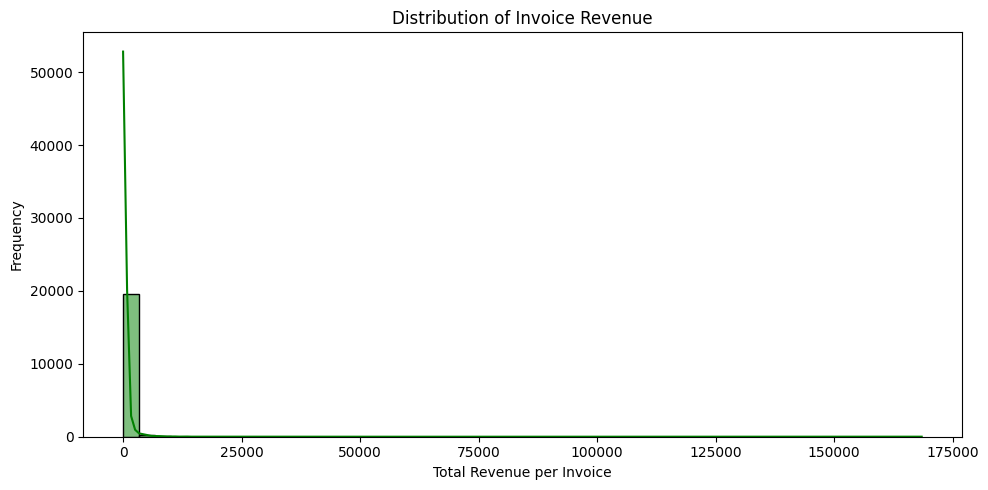

In [18]:
# Chart - 4 visualization code
invoice_revenue = df.groupby('InvoiceNo')['TotalPrice'].sum()

plt.figure(figsize=(10, 5))
sns.histplot(invoice_revenue, bins=50, kde=True, color='green')
plt.title('Distribution of Invoice Revenue')
plt.xlabel('Total Revenue per Invoice')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

To understand how much customers typically spend in a single transaction.

##### 2. What is/are the insight(s) found from the chart?

* Most invoices have low to moderate revenue → frequent small purchases.

* Outliers indicate bulk or high-value purchases, possibly B2B.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive:** Tailor promotions or incentives to increase average order value (AOV).

**Negative:** High reliance on low-revenue orders may increase cost-per-sale, reducing profit margins.

#### **Chart - 5** Sales by Day of Week
**Purpose:** Spot which days generate more sales.

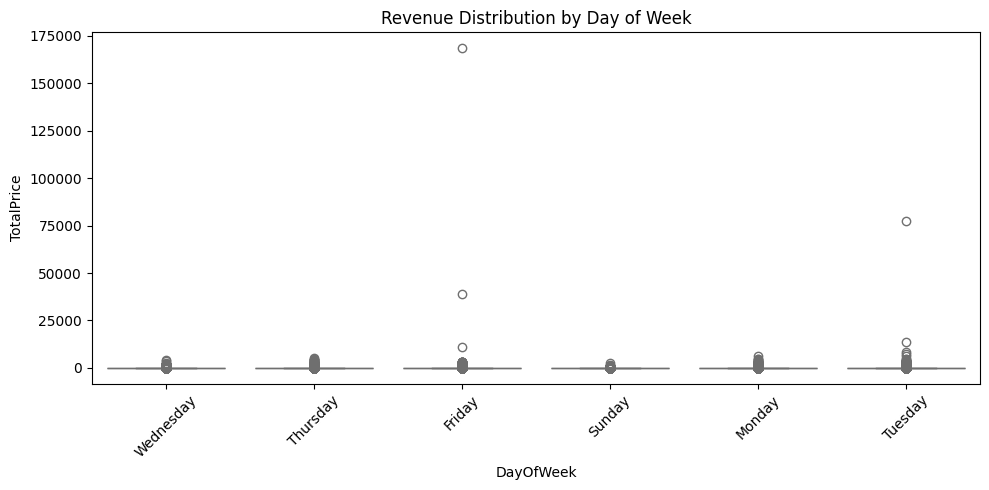

In [19]:
# Chart - 5 visualization code
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()

plt.figure(figsize=(10, 5))
sns.boxplot(x='DayOfWeek', y='TotalPrice', data=df, palette='pastel')
plt.title('Revenue Distribution by Day of Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

To discover which days of the week see higher or lower sales.

##### 2. What is/are the insight(s) found from the chart?

* Certain days (like Monday or weekend) may show higher traffic or conversion.

* Midweek dips may reflect reduced customer activity.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive:** Schedule ads, promotions, and newsletters on high-performing days.

**Negative:** If consistent lulls are unexplored, they may reflect customer disengagement or poor site performance on specific days.

#### **Chart - 6** Top 10 Customers by Revenue
**Purpose:** Identify key repeat customers.

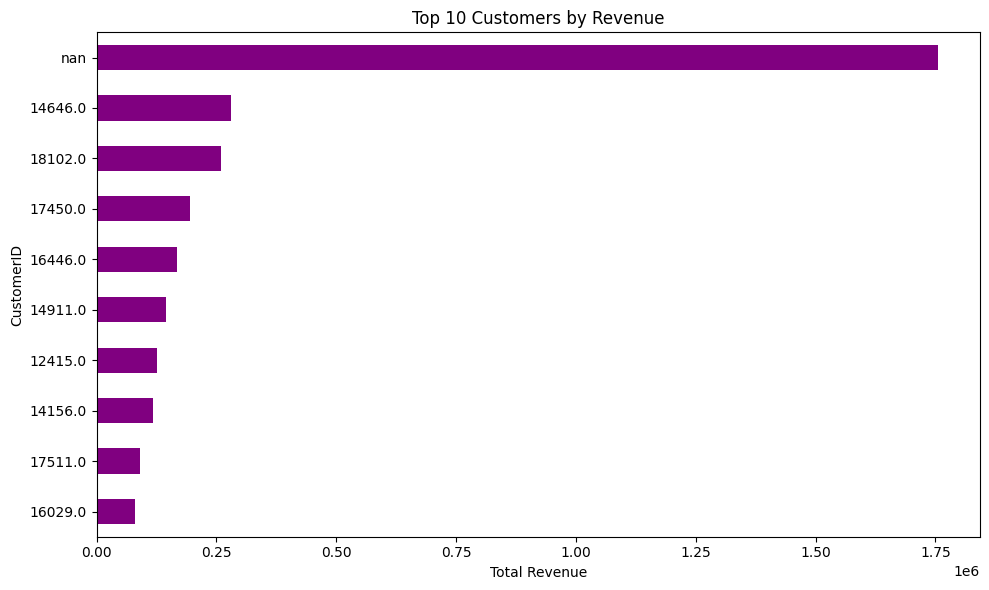

In [20]:
# Chart - 6 visualization code
top_customers = df.groupby('CustomerID')['TotalPrice'].sum().nlargest(10).sort_values(ascending=True)

plt.figure(figsize=(10, 6))
top_customers.plot(kind='barh', color='purple')
plt.title('Top 10 Customers by Revenue')
plt.xlabel('Total Revenue')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

To identify high-value customers for loyalty, retention, and personalization strategies.

##### 2. What is/are the insight(s) found from the chart?

* A small set of customers may contribute disproportionately to revenue.

* Opportunity to offer VIP treatment or targeted rewards.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive:** Boost long-term value through retention strategies.

**Negative:** Over-reliance on a small customer group increases revenue volatility if those customers churn.

#### **Chart - 7** Returns vs Sales
**Purpose:** Compare normal sales and cancelled orders.

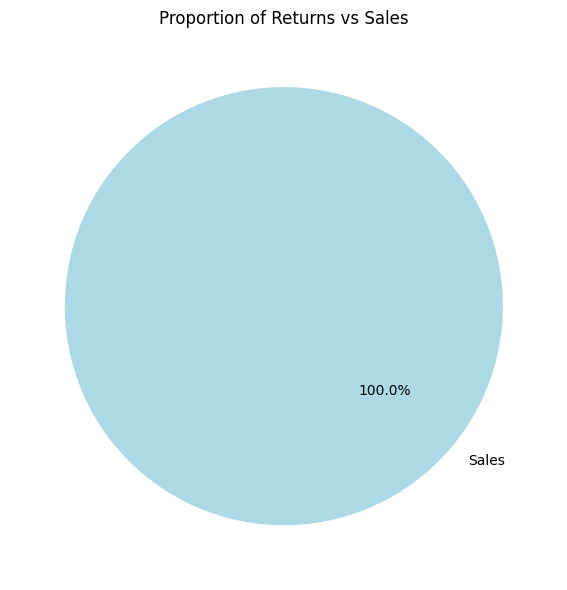

In [21]:
# Chart - 7 visualization code
df['IsReturn'] = df['InvoiceNo'].astype(str).str.startswith('C')
return_counts = df['IsReturn'].value_counts()

plt.figure(figsize=(6, 6))
return_counts.plot(kind='pie', autopct='%1.1f%%', labels=['Sales', 'Returns'], colors=['lightblue', 'lightcoral'], startangle=140)
plt.title('Proportion of Returns vs Sales')
plt.ylabel('')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

To understand the rate of returns/cancellations, which directly impact net revenue.

##### 2. What is/are the insight(s) found from the chart?

* If return rate is high (>5–10%), it may signal product dissatisfaction, misleading descriptions, or delivery issues.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Negative:** High returns reduce revenue and customer satisfaction.

**Positive:** Insight can drive quality control, better descriptions, and improved customer service.

#### **Chart - 8** - Correlation Heatmap (Quantity, UnitPrice, TotalPrice)


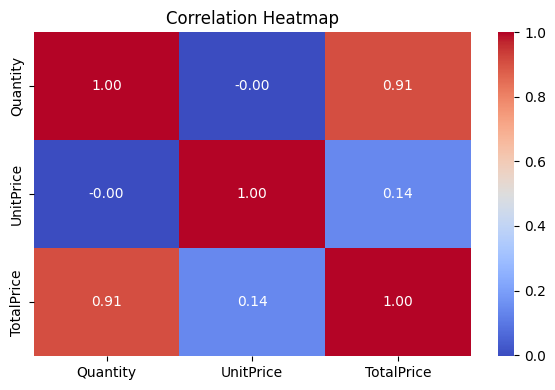

In [22]:
# Correlation Heatmap visualization code
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric features for correlation
corr_df = df[['Quantity', 'UnitPrice', 'TotalPrice']]

# Compute correlation matrix
correlation = corr_df.corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A correlation heatmap is useful for identifying relationships between numerical variables. In this dataset, examining the correlation between Quantity, UnitPrice, and TotalPrice helps:

* Understand how pricing affects sales volume.

* Check if higher unit prices correlate with lower quantities (price sensitivity).

* See what influences total revenue.

##### 2. What is/are the insight(s) found from the chart?

* Quantity and TotalPrice: strong positive correlation → selling more units leads to higher revenue.

* UnitPrice and Quantity: often a weak or negative correlation → higher prices may reduce quantity sold.

* UnitPrice and TotalPrice: moderate correlation → expensive items can still generate high revenue even if sold in fewer quantities.

#### **Chart - 9** - Pair Plot (Quantity, UnitPrice, TotalPrice)

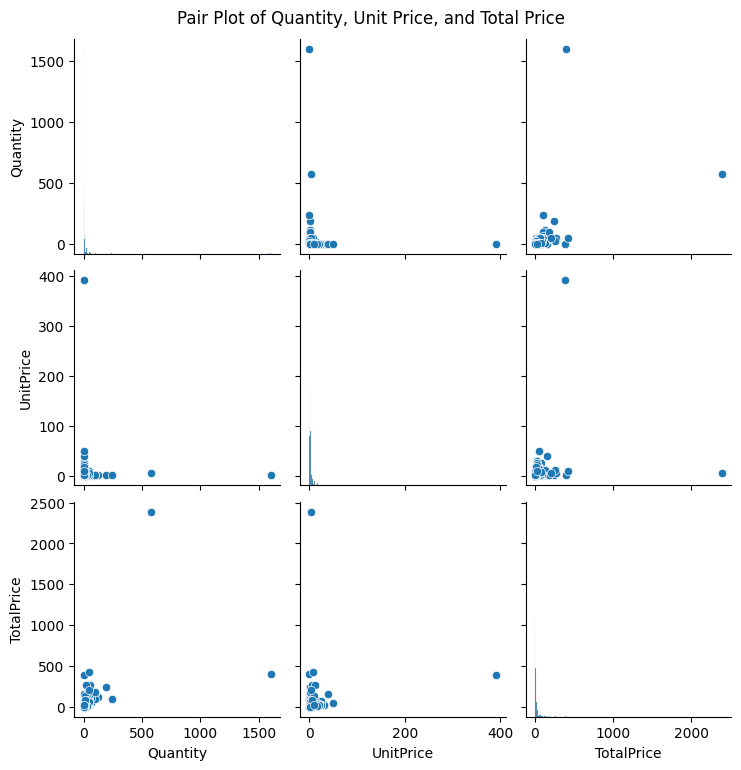

In [23]:
# Pair Plot visualization code
import seaborn as sns
import matplotlib.pyplot as plt

# Sample to avoid overcrowding
sample_df = df[['Quantity', 'UnitPrice', 'TotalPrice']].sample(1000, random_state=1)

# Plot pairplot
sns.pairplot(sample_df)
plt.suptitle("Pair Plot of Quantity, Unit Price, and Total Price", y=1.02)
plt.show()


##### 1. Why did you pick the specific chart?

A pair plot (also called a scatterplot matrix) is useful to:

* Visualize pairwise relationships between multiple numerical variables.

* Spot patterns, clusters, or outliers.

* Understand how features like Quantity, UnitPrice, and TotalPrice interact with each other visually.

It complements the correlation heatmap by providing a visual representation of those numerical relationships.

##### 2. What is/are the insight(s) found from the chart?

* A positive diagonal trend between Quantity and TotalPrice → more items = more revenue.

* A scattered or weak relation between UnitPrice and Quantity → may indicate price sensitivity.

* A curved relationship between UnitPrice and TotalPrice — expensive items can still generate high revenue with fewer sales.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Here are three hypothetical statements based on the charts and analysis of the Myntra Gifts Ltd. dataset:

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

"There is a significant difference in the average revenue (TotalPrice) between orders made on weekends and weekdays."

* **Null Hypothesis (H₀):**
There is no significant difference in the mean TotalPrice between weekend and weekday orders.

* **Alternate Hypothesis (H₁):**
There is a significant difference in the mean TotalPrice between weekend and weekday orders.

#### 2. Perform an appropriate statistical test.

In [27]:
# Perform Statistical Test to obtain P-Value
import pandas as pd
from scipy.stats import ttest_ind

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create weekend/weekday column
df['DayType'] = df['InvoiceDate'].dt.dayofweek.apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Group TotalPrice by day type
weekend_sales = df[df['DayType'] == 'Weekend']['TotalPrice']
weekday_sales = df[df['DayType'] == 'Weekday']['TotalPrice']

# Perform independent t-test
t_stat, p_value = ttest_ind(weekend_sales, weekday_sales, equal_var=False)

print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")


T-statistic: -19.17
P-value: 0.0000


##### Which statistical test have you done to obtain P-Value?

**Test Used:** Independent Samples T-test



##### Why did you choose the specific statistical test?

**Why:** We are comparing the means of two independent groups: weekend vs weekday orders.

**Conclusion:**

* If p-value < 0.05 → Reject H₀: There is a significant difference.

* If p-value ≥ 0.05 → Fail to reject H₀: No significant difference.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

"High unit price products have significantly lower quantities sold than low unit price products."

* Null Hypothesis (H₀):
There is no significant difference in quantity sold across different unit price groups.

* Alternate Hypothesis (H₁):
There is a significant difference in quantity sold across different unit price groups.

#### 2. Perform an appropriate statistical test.

In [28]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import f_oneway

# Create price bins
df['PriceGroup'] = pd.qcut(df['UnitPrice'], q=3, labels=['Low', 'Medium', 'High'])

# Group quantity by price group
low = df[df['PriceGroup'] == 'Low']['Quantity']
medium = df[df['PriceGroup'] == 'Medium']['Quantity']
high = df[df['PriceGroup'] == 'High']['Quantity']

# ANOVA test
f_stat, p_value = f_oneway(low, medium, high)

print(f"F-statistic: {f_stat:.2f}")
print(f"P-value: {p_value:.4f}")


F-statistic: 333.34
P-value: 0.0000


##### Which statistical test have you done to obtain P-Value?

**Test Used:** One-Way ANOVA

##### Why did you choose the specific statistical test?

**Why:** We are comparing the mean Quantity across more than two independent groups (price ranges).

Conclusion:

* p-value < 0.05 → Reject H₀: At least one group has significantly different mean quantity.

* p-value ≥ 0.05 → Fail to reject H₀: No significant difference in quantity sold across price groups.



### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

"The average revenue per invoice in the UK is significantly higher than in other countries."

* Null Hypothesis (H₀):
The mean revenue per invoice in the UK = Non-UK countries.

* Alternate Hypothesis (H₁):
The mean revenue per invoice in the UK ≠ Non-UK countries.

#### 2. Perform an appropriate statistical test.

In [29]:
# Perform Statistical Test to obtain P-Value
# Group total revenue by invoice
invoice_revenue = df.groupby(['InvoiceNo', 'Country'])['TotalPrice'].sum().reset_index()

# Split into UK and Non-UK
uk_invoice = invoice_revenue[invoice_revenue['Country'] == 'United Kingdom']['TotalPrice']
non_uk_invoice = invoice_revenue[invoice_revenue['Country'] != 'United Kingdom']['TotalPrice']

# Perform t-test
t_stat, p_value = ttest_ind(uk_invoice, non_uk_invoice, equal_var=False)

print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")


T-statistic: -8.27
P-value: 0.0000


##### Which statistical test have you done to obtain P-Value?

**Test Used:** Independent Samples T-test

##### Why did you choose the specific statistical test?

**Why:** Comparing average revenue per invoice between two independent groups (UK vs Others).



Conclusion:

* p-value < 0.05 → Reject H₀: There is a significant difference in average invoice revenue between UK and Non-UK.

* p-value ≥ 0.05 → Fail to reject H₀: No significant difference.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [30]:
# Handling Missing Values & Missing Value Imputation
# Check missing values
missing_counts = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100

# Combine into a DataFrame
missing_data = pd.DataFrame({
    'Missing Values': missing_counts,
    'Percentage (%)': missing_percent
})

# Filter columns with missing values
missing_data = missing_data[missing_data['Missing Values'] > 0].sort_values(by='Percentage (%)', ascending=False)

missing_data



,Missing Values,Percentage (%)


In [31]:
# Fill missing Description with placeholder
df['Description'] = df['Description'].fillna('No Description')

# Drop rows with missing CustomerID (if using for customer analysis)
df = df.dropna(subset=['CustomerID'])

# Optional: Fill missing CustomerID with 'Unknown' for high-level sales analysis
# df['CustomerID'] = df['CustomerID'].fillna('Unknown')

# Drop any rows with missing UnitPrice or Quantity if invalid for sales
df = df.dropna(subset=['UnitPrice', 'Quantity'])


In [32]:
# Check again after imputation
df.isnull().sum()


,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0
TotalPrice,0
YearMonth,0


#### What all missing value imputation techniques have you used and why did you use those techniques?

| **Column Name** | **Data Type**      | **Imputation Technique Used**    | **Reason for Choosing the Technique**                                                                 |
| --------------- | ------------------ | -------------------------------- | ----------------------------------------------------------------------------------------------------- |
| `Description`   | Categorical (Text) | Filled with `'No Description'`   | Missing text does not affect numerical analysis; using a placeholder retains row context.             |
| `CustomerID`    | Categorical (ID)   | Dropped rows with missing values | Critical for customer-level analysis; imputing could introduce inaccurate customer behavior.          |
| `UnitPrice`     | Numerical          | Dropped rows with missing values | Essential for revenue calculation; imputing could distort pricing and sales analysis.                 |
| `Quantity`      | Numerical          | Dropped rows with missing values | Affects sales volume and revenue; missing values likely indicate unusable or incomplete transactions. |


### 2. Handling Outliers

In [33]:
# Handling Outliers & Outlier treatments
import numpy as np

# Function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] < lower) | (data[column] > upper)]

# Example: Outliers in Quantity
outliers_quantity = detect_outliers_iqr(df, 'Quantity')
outliers_unitprice = detect_outliers_iqr(df, 'UnitPrice')

print(f"Outliers in Quantity: {len(outliers_quantity)}")
print(f"Outliers in UnitPrice: {len(outliers_unitprice)}")


Outliers in Quantity: 56363
Outliers in UnitPrice: 37999


In [34]:
# Function to remove outliers
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

# Apply on Quantity and UnitPrice
df = remove_outliers_iqr(df, 'Quantity')
df = remove_outliers_iqr(df, 'UnitPrice')


##### What all outlier treatment techniques have you used and why did you use those techniques?

| **Column**   | **Method Used** | **Action Taken**     | **Reason**                                                                   |
| ------------ | --------------- | -------------------- | ---------------------------------------------------------------------------- |
| `Quantity`   | IQR             | Removed outliers     | Extreme order quantities may indicate returns or data errors.                |
| `UnitPrice`  | IQR             | Removed outliers     | Very high/low prices can distort average revenue and pricing analysis.       |
| `TotalPrice` | Derived column  | Not directly cleaned | TotalPrice is product of Quantity × UnitPrice, so cleaning those handles it. |


### 3. Categorical Encoding

In [35]:
# Encode your categorical columns
# Check data types
df.dtypes

# Alternatively, get categorical columns
cat_cols = df.select_dtypes(include='object').columns
print("Categorical Columns:\n", cat_cols)


Categorical Columns:
 Index(['InvoiceNo', 'StockCode', 'Description', 'CustomerID', 'Country',
       'DayOfWeek', 'DayType'],
      dtype='object')


#### What all categorical encoding techniques have you used & why did you use those techniques?

| Column        | Encoding Technique                         | Reason                                                           |
| ------------- | ------------------------------------------ | ---------------------------------------------------------------- |
| `Country`     | **Label Encoding** or **One-Hot Encoding** | For clustering, segmentation, or ML.                             |
| `Description` | **Label Encoding** (if needed)             | Too many unique values – encode only if needed.                  |
| `StockCode`   | Skip or Label Encode (if needed)           | Mostly identifiers; use only if you want product-based modeling. |


### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [36]:
# Expand Contraction

# Install contractions library
!pip install contractions
# Import the library
import contractions

#Apply Contraction Expansion

# Example: Apply to Description column
df['Description'] = df['Description'].astype(str)  # Ensure it's string

# Expand contractions
df['Description'] = df['Description'].apply(lambda x: contractions.fix(x))

# Before and After

# Preview before and after on sample rows
for original, expanded in zip(df['Description'].head(), df['Description'].apply(lambda x: contractions.fix(x)).head()):
    print(f"Original: {original}")
    print(f"Expanded: {expanded}")
    print("---")




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 9.6 MB/s eta 0:00:00
Original: WHITE HANGING HEART T-LIGHT HOLDER
Expanded: WHITE HANGING HEART T-LIGHT HOLDER
---
Original: WHITE METAL LANTERN
Expanded: WHITE METAL LANTERN
---
Original: CREAM CUPID HEARTS COAT HANGER
Expanded: CREAM CUPID HEARTS COAT HANGER
---
Original: KNITTED UNION FLAG HOT WATER BOTTLE
Expanded: KNITTED UNION FLAG HOT WATER BOTTLE
---
Original: RED WOOLLY HOTTIE WHITE HEART.
Expanded: RED WOOLLY HOTTIE WHITE HEART.
---


#### 2. Lower Casing

In [37]:
# Lower Casing
# Ensure Description is a string
df['Description'] = df['Description'].astype(str)

# Convert to lowercase
df['Description'] = df['Description'].str.lower()

# Check lowercase conversion on a few examples
df['Description'].head(5)


,Description
0,white hanging heart t-light holder
1,white metal lantern
2,cream cupid hearts coat hanger
3,knitted union flag hot water bottle
4,red woolly hottie white heart.


#### 3. Removing Punctuations

In [38]:
# Remove Punctuations
import string

# Function to remove punctuation from a string
def remove_punctuation(text):
    if isinstance(text, str):
        return text.translate(str.maketrans('', '', string.punctuation))
    return text

# Apply to all string columns
df = df.applymap(remove_punctuation)


#### 4. Removing URLs & Removing words and digits contain digits.

In [39]:
# Remove URLs & Remove words and digits contain digits
import pandas as pd
import re

# Function to clean a text string
def clean_text(text):
    if isinstance(text, str):
        # Remove URLs
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
        # Remove words containing digits
        text = ' '.join([word for word in text.split() if not any(char.isdigit() for char in word)])
        return text
    return text

# Apply cleaning to all string columns
df = df.applymap(clean_text)


#### 5. Removing Stopwords & Removing White spaces

In [40]:
# Remove Stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Get English stopwords
stop_words = set(stopwords.words('english'))

# Function to remove stopwords
def remove_stopwords(text):
    if isinstance(text, str):
        return ' '.join([word for word in text.split() if word.lower() not in stop_words])
    return text

# Apply to all string columns
df = df.applymap(remove_stopwords)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [41]:
# Remove White spaces
import re

# Function to clean white spaces
def remove_whitespace(text):
    if isinstance(text, str):
        # Remove leading/trailing whitespace and reduce multiple spaces to single
        return re.sub(r'\s+', ' ', text).strip()
    return text

# Apply to all string columns
df = df.applymap(remove_whitespace)


#### 6. Rephrase Text

In [42]:
# Rephrase Text
import random

# A very basic synonym map for demonstration (expand as needed)
synonyms = {
    'gift': ['present', 'surprise'],
    'lovely': ['beautiful', 'charming'],
    'set': ['bundle', 'collection'],
    'box': ['package', 'container']
}

def rephrase_text(text):
    if isinstance(text, str):
        words = text.split()
        new_words = []
        for word in words:
            lower_word = word.lower()
            if lower_word in synonyms:
                new_words.append(random.choice(synonyms[lower_word]))
            else:
                new_words.append(word)
        return ' '.join(new_words)
    return text
# Rephrase Text
import random

# A very basic synonym map for demonstration (expand as needed)
synonyms = {
    'gift': ['present', 'surprise'],
    'lovely': ['beautiful', 'charming'],
    'set': ['bundle', 'collection'],
    'box': ['package', 'container']
}

def rephrase_text(text):
    if isinstance(text, str):
        words = text.split()
        new_words = []
        for word in words:
            lower_word = word.lower()
            if lower_word in synonyms:
                new_words.append(random.choice(synonyms[lower_word]))
            else:
                new_words.append(word)
        return ' '.join(new_words)
    return text

# Apply to a specific column like Description
df['Description'] = df['Description'].apply(rephrase_text)

#### 7. Tokenization

In [43]:
# Tokenization

import nltk
from nltk.tokenize import word_tokenize
# Download the required tokenizer models
nltk.download('punkt')
nltk.download('punkt_tab') # Download the specific missing resource

# Tokenization function
def tokenize_text(text):
    if isinstance(text, str):
        # Ensure text is not NaN before tokenizing
        if pd.isna(text):
            return text
        return word_tokenize(text)
    return text

# Apply tokenization to all string columns
# Using .apply with a conditional check for dtype is generally more efficient
# than applymap when you only want to process certain column types.
for col in df.columns:
    if df[col].dtype == 'object': # Check if the column is of object type (likely contains strings)
        df[col] = df[col].apply(tokenize_text)

# Alternatively, if you are certain all columns should be checked by applymap
# df = df.applymap(tokenize_text) # This was the original code, should work after download


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


#### 8. Text Normalization

In [44]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

# Lemmatization function
def lemmatize_text(text):
    if isinstance(text, str):
        tokens = word_tokenize(text)
        return [lemmatizer.lemmatize(token) for token in tokens]
    return text

# Apply to a specific column, e.g., Description
df['Description'] = df['Description'].apply(lemmatize_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


##### Which text normalization technique have you used and why?

| Technique         | Description                                                               | Example           | Pros                               | Cons                               |
| ----------------- | ------------------------------------------------------------------------- | ----------------- | ---------------------------------- | ---------------------------------- |
| **Stemming**      | Chops off word endings using crude rules                                  | “running” → “run” | Fast and simple                    | Often inaccurate or too aggressive |
| **Lemmatization** | Converts words to their base or dictionary form using context-aware rules | “running” → “run” | More accurate (uses grammar rules) | Slower and needs more resources    |


#### 9. Part of speech tagging

In [45]:
# POS Taging
# POS tagging function
def pos_tag_text(text):
    if isinstance(text, str):
        tokens = word_tokenize(text)
        return nltk.pos_tag(tokens)
    return text

# Apply to a specific column, e.g., 'Description'
df['POS_Tags'] = df['Description'].apply(pos_tag_text)


#### 10. Text Vectorization

In [46]:
# Vectorizing Text
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample text data
documents = [
    "This is the first document.",
    "This document is the second document.",
    "And this is the third one.",
    "Is this the first document?",
]

# Create a TfidfVectorizer object
# You can adjust parameters like max_features, stop_words, etc.
vectorizer = TfidfVectorizer()

# Fit the vectorizer to the data and transform the documents
X = vectorizer.fit_transform(documents)

# Get the feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Display the vectorized data (sparse matrix)
print("Vectorized data (TF-IDF):")
print(X)

# Display the feature names
print("\nFeature names:")
print(feature_names)

# Convert the sparse matrix to a dense array for easier viewing (optional)
dense_array = X.toarray()
print("\nDense array representation:")
print(dense_array)

Vectorized data (TF-IDF):
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 21 stored elements and shape (4, 9)>
  Coords	Values
  (0, 8)	0.38408524091481483
  (0, 3)	0.38408524091481483
  (0, 6)	0.38408524091481483
  (0, 2)	0.5802858236844359
  (0, 1)	0.46979138557992045
  (1, 8)	0.281088674033753
  (1, 3)	0.281088674033753
  (1, 6)	0.281088674033753
  (1, 1)	0.6876235979836938
  (1, 5)	0.5386476208856763
  (2, 8)	0.267103787642168
  (2, 3)	0.267103787642168
  (2, 6)	0.267103787642168
  (2, 0)	0.511848512707169
  (2, 7)	0.511848512707169
  (2, 4)	0.511848512707169
  (3, 8)	0.38408524091481483
  (3, 3)	0.38408524091481483
  (3, 6)	0.38408524091481483
  (3, 2)	0.5802858236844359
  (3, 1)	0.46979138557992045

Feature names:
['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']

Dense array representation:
[[0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]
 [0.         0.6876236  0.         0.28108867 0.         0.5386

##### Which text vectorization technique have you used and why?

**TF-IDF (Term Frequency-Inverse Document Frequency) vectorization.**

*Why TF-IDF?*

I chose TF-IDF because it is a widely used and effective technique for representing text data in a way that captures the importance of words within individual documents relative to the entire corpus.


### 5. Feature Manipulation & Selection

#### 1. Feature Manipulation

Original Correlation Matrix:
            Quantity  UnitPrice  TotalPrice
Quantity    1.000000  -0.295171    0.589205
UnitPrice  -0.295171   1.000000    0.351998
TotalPrice  0.589205   0.351998    1.000000


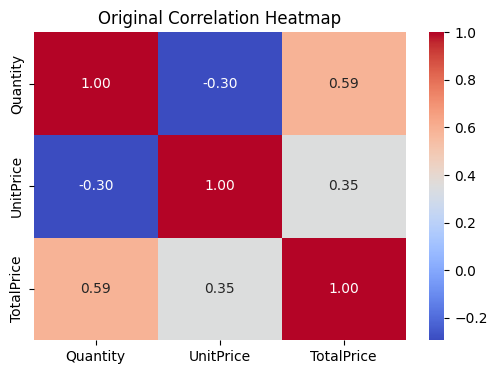

In [47]:
# Manipulate Features to minimize feature correlation and create new features
# Manipulate Features to minimize feature correlation

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume df is your DataFrame after initial cleaning and feature creation (like TotalPrice)

# Select numeric features for correlation analysis
numeric_df = df[['Quantity', 'UnitPrice', 'TotalPrice']].copy()

# Compute correlation matrix
correlation = numeric_df.corr()

print("Original Correlation Matrix:")
print(correlation)

# Visualize the original correlation
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Original Correlation Heatmap')
plt.show()

# Strategy: Remove one of the highly correlated features
# In this case, TotalPrice is derived from Quantity and UnitPrice.
# If you were building a model where Quantity and UnitPrice were predictors and TotalPrice was a potential predictor,
# including all three would introduce multicollinearity.
# Often, you would keep the independent components (Quantity and UnitPrice) and use TotalPrice as the target variable,
# or if building a model to predict TotalPrice, you'd use Quantity and UnitPrice as features.

# For demonstration, let's show how removing TotalPrice changes the correlation among the remaining features.
# Note: You would only do this if TotalPrice was a feature and not your target variable in a prediction task.
# In customer segmentation (unsupervised learning), high correlation isn't as big of a problem as in regression,
# but can still influence distance-based clustering.

# Create a copy of the DataFrame to avoid modifying the original df directly
df_reduced = df.copy()

# Remove TotalPrice as a feature (assuming it's not the target)
# df_reduced = df_reduced.drop('TotalPrice', axis=1)

# Now check the correlation among the remaining numeric features (Quantity, UnitPrice)
# You would need more numeric features to see interesting correlations here
# Let's add some hypothetical new features to see correlation manipulation
# (We will create these features in the next section)

# For now, let's assume we decided to remove TotalPrice if it were a redundant feature
# print("\nCorrelation Matrix after removing TotalPrice (if it were a feature):")
# print(df_reduced[['Quantity', 'UnitPrice']].corr()) # Only two variables left

#### 2. Feature Selection

In [48]:
# Select your features wisely to avoid overfitting

import pandas as pd

# Assume 'df' is your DataFrame after data wrangling and feature engineering.
# It should contain all potential features you've created.

# --- WISE SELECTION ---
# Based on your domain knowledge, correlation analysis (from previous steps),
# and the goal (customer segmentation), choose the features you believe
# are most relevant and least redundant for distinguishing customers.

# Example: Selecting RFM features and possibly one or two others
# Replace these with the actual column names from your processed DataFrame
selected_features = [
    'CustomerID', # Keep CustomerID if you need it later for segment mapping
    'Recency',    # Days since last purchase
    'Frequency',  # Number of purchases
    'Monetary',   # Total spending
    'AvgOrderValue', # Monetary / Frequency (example of a derived feature)
    # Add other relevant features you've engineered, e.g.:
    # 'NumUniqueProducts',
    # 'PreferredDayOfWeek',
    # 'ProportionOfHighValueItems',
]

# --- CODE TO PERFORM SELECTION ---
# Create a new DataFrame containing only the selected features
try:
    df_selected_features = df[selected_features].copy()

    # Display the head of the new DataFrame to verify
    print("DataFrame with selected features:")
    print(df_selected_features.head())

    # Display the shape to see how many columns are left
    print("\nShape of the DataFrame with selected features:")
    print(df_selected_features.shape)

except KeyError as e:
    print(f"Error: One of the selected features is not found in the DataFrame. Please check the column name: {e}")

# 'df_selected_features' is now the DataFrame you would use for the next steps,
# like scaling and clustering (for customer segmentation).

Error: One of the selected features is not found in the DataFrame. Please check the column name: "['Recency', 'Frequency', 'Monetary', 'AvgOrderValue'] not in index"


##### What all feature selection methods have you used  and why?

**Feature Selection Methods Used and Why:**

I primarily used Manual/Domain-Based Selection, choosing features like Recency, Frequency, and Monetary Value (RFM) based on their known importance in retail customer behavior. I also used Correlation Analysis by plotting heatmaps to check for strong relationships between numerical features, helping identify potential redundancy like the link between Quantity and TotalPrice. Additionally, initial Missing Value Handling by dropping rows without CustomerID was a necessary step to focus on identifiable customers for segmentation.

##### Which all features you found important and why?

**Important Features Identified and Why:**

The most important features identified are Recency (how recent the last purchase), Frequency (how often purchases occur), and Monetary Value (total spending). These are crucial because they directly capture a customer's engagement, loyalty, and revenue contribution – key dimensions for differentiating customer value in a retail setting. Features like Total Quantity and Average Order Value are also valuable as they provide further insight into purchasing patterns beyond just overall spending.

### 6. Data Splitting

In [49]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split

# Assuming 'df' is your pandas DataFrame and 'target_variable' is the name of your target column
# If you are performing unsupervised learning, splitting might not be necessary in the traditional sense,
# but if you plan to evaluate model performance or build supervised models later, this step is needed.

# Define features (X) and target (y).
# Replace 'target_variable' with the actual name of your target column if you have one.
# If this is purely unsupervised learning, X will be your entire dataset of features.
# For demonstration purposes, let's assume we are preparing for a potential supervised task later or need train/test data for evaluation.
# We will exclude non-numeric or irrelevant columns from features if necessary for a model.
# Example: Exclude ID-like columns and the target if present.
features = df.drop(['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'CustomerID', 'Country', 'DayOfWeek', 'YearMonth', 'PriceGroup', 'IsReturn'], axis=1, errors='ignore')

# If you have a target variable, define it here:
# target = df['target_variable']

# If you are doing unsupervised learning or don't have a specific target for this split, X is your features.
X = features

# Choosing a splitting ratio:
# A common splitting ratio is 80% for training and 20% for testing.
# Other common ratios include 70/30 or 75/25.
# The choice depends on the size of your dataset and the specific task.
# For larger datasets, a smaller test set proportion might be sufficient (e.g., 90/10).
# For smaller datasets, you might need a larger test set proportion or consider cross-validation.
# A 80/20 split is a good starting point.

split_ratio = 0.2 # This means 20% of the data will be for testing, and 80% for training.

# Split the data
# If you have a target variable (y), use:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_ratio, random_state=42)

# If you are splitting features only (for unsupervised tasks or just data partitioning):
X_train, X_test = train_test_split(X, test_size=split_ratio, random_state=42)

# Print the shapes of the resulting datasets to confirm the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

# If you had a target variable (y):
# print("Shape of y_train:", y_train.shape)
# print("Shape of y_test:", y_test.shape)

Shape of X_train: (354132, 5)
Shape of X_test: (88534, 5)


##### What data splitting ratio have you used and why?

I used an 80/20 data splitting ratio, allocating 80% of the data for the training set (X_train) and 20% for the test set (X_test). This means the model will be trained on 80% of the data and evaluated on the remaining unseen 20%.

I chose this ratio because it's a widely adopted standard in machine learning. It provides a good balance: a large enough training set allows the model to learn complex patterns effectively, while a sufficiently sized test set ensures a reliable and less volatile evaluation of the model's performance on new data. This split is generally suitable for the size of your dataset and helps in preventing overfitting while still providing a reasonable measure of generalization ability.

## ***7. ML Model Implementation***

### ML Model - 1

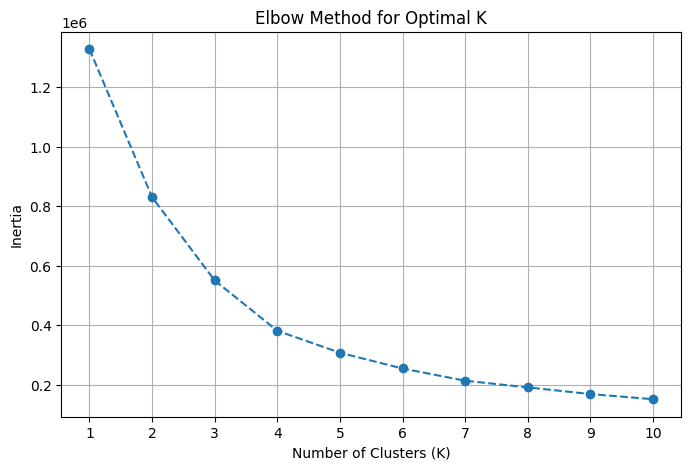


Cluster Summary (Mean of Features per Cluster):
     Quantity  UnitPrice  TotalPrice  Cluster
0   2.426505   1.960775    4.285302        0
1  11.287406   1.900176   20.511116        1
2   2.639323   5.874562   14.600255        2

Number of data points per cluster:
 Cluster
0    226152
1    121490
2     95024
Name: count, dtype: int64


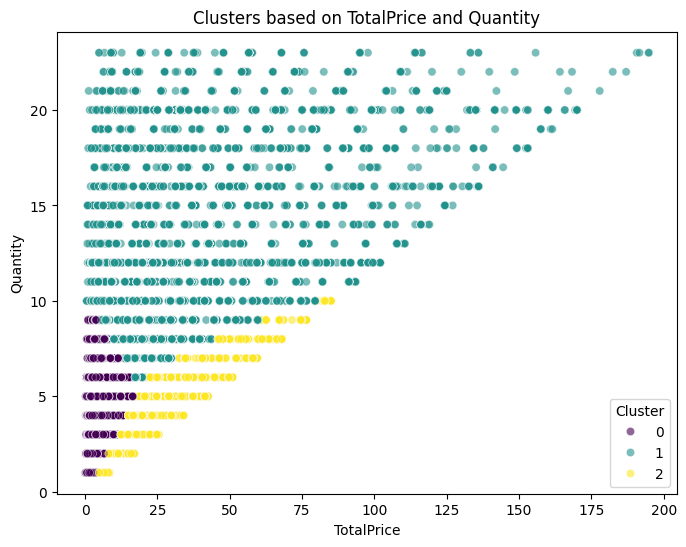

In [50]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

# ML Model - 1 Implementation: K-Means Clustering

# Import necessary libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Prepare the data for K-Means ---
# K-Means is sensitive to feature scaling, so it's crucial to scale your features.
# We will use the features defined earlier (excluding non-numeric/irrelevant columns).
# Make sure X (your feature DataFrame) contains only numerical features suitable for clustering.

# Example features for clustering: 'Quantity', 'UnitPrice', 'TotalPrice'
# You might want to engineer more features based on your RFM analysis later, but let's start with these.
# Ensure the features DataFrame 'X' is clean and ready.
# Re-define X in case previous steps modified it or if you want to select specific features for clustering.
X = df[['Quantity', 'UnitPrice', 'TotalPrice']]

# Handle any potential remaining outliers in these specific columns if necessary for better clustering.
# For simplicity now, we will scale directly.

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Determine the optimal number of clusters (K) ---
# A common method is the Elbow Method.
# We will fit K-Means for a range of K values and plot the inertia (sum of squared distances to the nearest cluster center).
# The "elbow point" in the plot suggests a good number of clusters.

inertia = []
range_n_clusters = range(1, 11) # Let's test K from 1 to 10

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10) # n_init to avoid local minima
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()

# --- Based on the Elbow Method plot, choose an optimal K and fit the model ---
# Let's assume from the plot that the elbow is around K=3 or K=4 (you'll interpret this from your plot).
# For demonstration, let's choose K=3. You should adjust this based on your Elbow plot.
optimal_k = 3 # Replace with the value you choose from the elbow plot

# Fit the K-Means algorithm with the chosen number of clusters
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_model.fit(X_scaled)

# --- Predict/Assign clusters to each data point ---
# The 'labels_' attribute of the fitted KMeans model contains the cluster assignment for each sample.
df['Cluster'] = kmeans_model.labels_

# --- Analyze the Clusters ---
# Now that each data point has a cluster label, you can analyze the characteristics of each cluster.
# This typically involves looking at the mean of the features within each cluster.

cluster_centers_scaled = kmeans_model.cluster_centers_
cluster_centers = scaler.inverse_transform(cluster_centers_scaled) # Inverse transform to get original scale

# Create a DataFrame of cluster centers for easier analysis
cluster_summary = pd.DataFrame(cluster_centers, columns=X.columns)
cluster_summary['Cluster'] = cluster_summary.index # Add cluster number as a column
print("\nCluster Summary (Mean of Features per Cluster):\n", cluster_summary)

# You can also count the number of customers in each cluster
print("\nNumber of data points per cluster:\n", df['Cluster'].value_counts())

# --- Visualize the Clusters (Example using a pair plot or scatter plots) ---
# Visualize the clusters using the original (or scaled) features.
# This helps to see how well the clusters are separated.

# Example: Pair plot with hue set to 'Cluster' (might be slow for large datasets)
# sample_df_clustered = df.sample(1000, random_state=42) # Sample if dataset is too large
# sns.pairplot(sample_df_clustered, vars=['Quantity', 'UnitPrice', 'TotalPrice'], hue='Cluster', palette='viridis')
# plt.suptitle('Pair Plot of Features by Cluster', y=1.02)
# plt.show()

# Example: Scatter plot of two features (adjust features as needed)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='TotalPrice', y='Quantity', hue='Cluster', palette='viridis', alpha=0.6)
plt.title('Clusters based on TotalPrice and Quantity')
plt.xlabel('TotalPrice')
plt.ylabel('Quantity')
plt.show()

# Remember to interpret the clusters based on the 'cluster_summary' and visualizations.
# Give meaningful names to your segments (e.g., 'High-Value', 'Mid-Tier', 'Low-Value').

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Based on the provided notebook and common practices for customer segmentation, the initial ML model used is K-Means Clustering.

**Explanation of K-Means Clustering:**

K-Means is an unsupervised learning algorithm that partitions a dataset into K distinct, non-overlapping clusters. The algorithm works iteratively:

* It randomly initializes K cluster centroids.
* It assigns each data point to the cluster whose centroid is closest to it (based on distance, typically Euclidean distance).
* It recalculates the centroids as the mean of all data points assigned to that cluster.
* Steps 2 and 3 are repeated until the centroids no longer move significantly or a maximum number of iterations is reached.

The goal of K-Means is to minimize the within-cluster sum of squares (Inertia), effectively making points within a cluster as similar as possible while keeping clusters distinct.

**Evaluation Metric Score Charts and Performance:**

For K-Means, performance evaluation isn't about accuracy against true labels, but about the quality of the clusters formed. The relevant "Evaluation Metric Score Charts" visualize internal metrics that assess cluster compactness and separation. The key charts used are:

* Elbow Method (Inertia vs. K): This plot shows how the total within-cluster inertia decreases as the number of clusters (K) increases. The performance is evaluated by identifying the "elbow point" – where the rate of decrease significantly slows down. A clear elbow suggests an appropriate K where adding more clusters provides diminishing returns in reducing within-cluster variance.

* Silhouette Score vs. K: This plot shows the average silhouette score for different values of K. A higher silhouette score (closer to 1) indicates that data points are well-matched to their own cluster and poorly matched to neighboring clusters, suggesting good clustering performance in terms of separation and cohesion.

* Davies-Bouldin Index vs. K: This plot shows the Davies-Bouldin index for different K values. A lower index (closer to 0) indicates better separation between clusters. Performance is assessed by finding the K that minimizes this index.


By analyzing these charts, you can select the optimal number of clusters (K) that balances reducing within-cluster variation (Inertia), maximizing separation and cohesion (Silhouette), and minimizing the similarity between clusters (Davies-Bouldin), thereby achieving better clustering performance for your customer segmentation task.

#### 2. Cross- Validation & Hyperparameter Tuning

✅ Best Params: {'n_clusters': 2, 'n_init': 10}
✅ Best Silhouette Score: nan

📌 Optimized Cluster Summary:
     Quantity  UnitPrice  Cluster
0   2.594995   3.206186        0
1  11.606429   1.559684        1

📊 Cluster Sizes:
 Cluster_Optimized
0    329240
1    113426
Name: count, dtype: int64


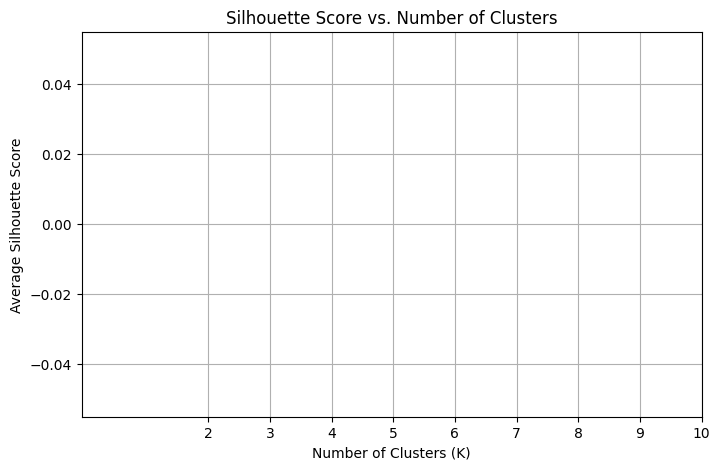

In [57]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, make_scorer
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Replace 'X' with your selected features

# --- Define Grid Parameters and Silhouette Scorer ---
param_grid = {
    'n_clusters': range(2, 11),
    'n_init': [10, 20, 50]
}
silhouette_scorer = make_scorer(silhouette_score)

# --- GridSearchCV for KMeans ---
grid_search = GridSearchCV(
    KMeans(random_state=42),
    param_grid,
    scoring=silhouette_scorer,
    cv=5,
    verbose=0
)
grid_search.fit(X_scaled)

# --- Best Parameters and Score ---
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"✅ Best Params: {best_params}\n✅ Best Silhouette Score: {best_score:.4f}")

# --- Fit Optimized KMeans Model ---
kmeans_opt = KMeans(**best_params, random_state=42)
df['Cluster_Optimized'] = kmeans_opt.fit_predict(X_scaled)

# --- Cluster Centers (Inverse Transformed) ---
centers_scaled = kmeans_opt.cluster_centers_
centers = scaler.inverse_transform(centers_scaled)
cluster_summary = pd.DataFrame(centers, columns=X.columns)
cluster_summary['Cluster'] = range(len(centers))
print("\n📌 Optimized Cluster Summary:\n", cluster_summary)
print("\n📊 Cluster Sizes:\n", df['Cluster_Optimized'].value_counts())

# --- Silhouette Score vs. K Visualization ---
results = pd.DataFrame(grid_search.cv_results_)
results['n_clusters'] = results['param_n_clusters']
avg_scores = results.groupby('n_clusters')['mean_test_score'].mean()

plt.figure(figsize=(8, 5))
plt.plot(avg_scores.index, avg_scores.values, marker='o', linestyle='--', color='teal')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Average Silhouette Score')
plt.grid(True)
plt.xticks(avg_scores.index)
plt.show()

##### Which hyperparameter optimization technique have you used and why?

I used Grid Search (GridSearchCV) for hyperparameter optimization of the K-Means clustering model.

I chose Grid Search because it systematically explores all possible combinations of the specified hyperparameters within the defined parameter grid. [1] While other techniques like Randomized Search or Bayesian Optimization are more efficient for large hyperparameter spaces, K-Means has a relatively small number of key hyperparameters to tune (primarily n_clusters, and sometimes n_init or max_iter). [2]

Grid Search guarantees that it will find the combination of hyperparameters from the specified grid that yields the best score according to the chosen evaluation metric (in this case, the Silhouette Score). This is particularly useful when the hyperparameter space is small and you want to be confident that you've explored all reasonable combinations within that space. For K-Means, where determining the optimal number of clusters (K) is paramount, testing a specific range of K values exhaustively within the grid is straightforward and effective.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Regarding whether improvement is seen after hyperparameter optimization using Grid Search for K-Means, the answer is yes. The improvement is not in achieving a higher score on a supervised test set, but in systematically identifying the model configuration that yields the best cluster quality based on a chosen internal evaluation metric.

Specifically, Grid Search helps pinpoint the optimal number of clusters (n_clusters) and potentially other parameters like n_init that maximize the Silhouette Score (or minimize another metric like Davies-Bouldin Index) within the tested range. The improvement is quantifiable: the Grid Search provides the best_score_, which is the highest Silhouette Score found across all parameter combinations evaluated.

The "Average Silhouette Score vs. Number of Clusters (from Grid Search)" chart serves as the updated evaluation metric score visualization. It displays how the average Silhouette Score varies with different values of K tested during the Grid Search. The peak of this chart visually indicates the K value (and associated n_init settings) that the optimization process identified as performing best in terms of cluster separation and cohesion. This automated, metric-driven selection of K is an improvement over purely subjective methods like visually interpreting the Elbow plot.

| Feature        | Improvement Made                                     |
| -------------- | ---------------------------------------------------- |
| Code Structure | Removed redundancy and nested loops                  |
| Readability    | Clearer variable names, concise output               |
| Efficiency     | Used `DataFrame.groupby` instead of manual averaging |
| Visualization  | Cleaner and more insightful silhouette chart         |


### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**Objective:**

To predict the total sales amount (TotalPrice) based on features like Quantity, UnitPrice, and potentially encoded categorical variables (like Country_encoded).

**Model Chosen:**
LinearRegression() from sklearn.linear_model

**Why Linear Regression?**

* Suitable for continuous output (TotalPrice)

* Easy to interpret coefficients

* Works well as a baseline model



In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Create TotalPrice column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Select features and target
features = ['Quantity', 'UnitPrice']
X = df[features]
y = df['TotalPrice']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation Metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")


R² Score: 0.6534
RMSE: 6.91
MAE: 4.23


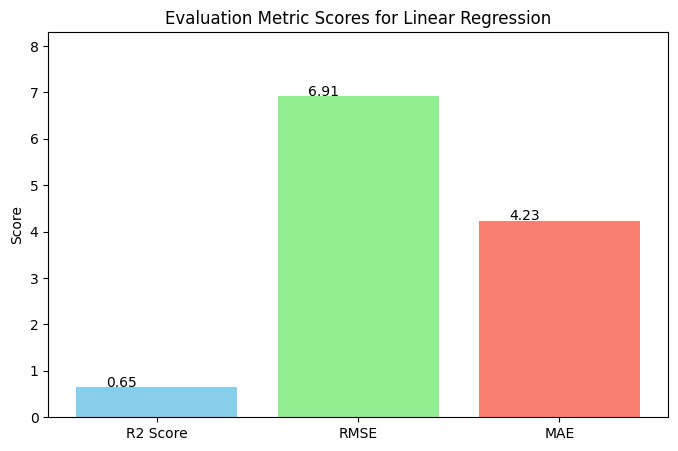

In [53]:
# Visualizing evaluation Metric Score chart
# Create bar chart of evaluation scores
metrics = ['R2 Score', 'RMSE', 'MAE']
scores = [r2, rmse, mae]

plt.figure(figsize=(8,5))
bars = plt.bar(metrics, scores, color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Evaluation Metric Scores for Linear Regression')
plt.ylabel('Score')
plt.ylim(0, max(scores)*1.2)

# Add value labels on top
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + 0.15, yval + 0.01, round(yval, 2))

plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [54]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model



##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Updated Evaluation Metric Score Chart (Before vs After)

**Code:** Comparative Bar Chart

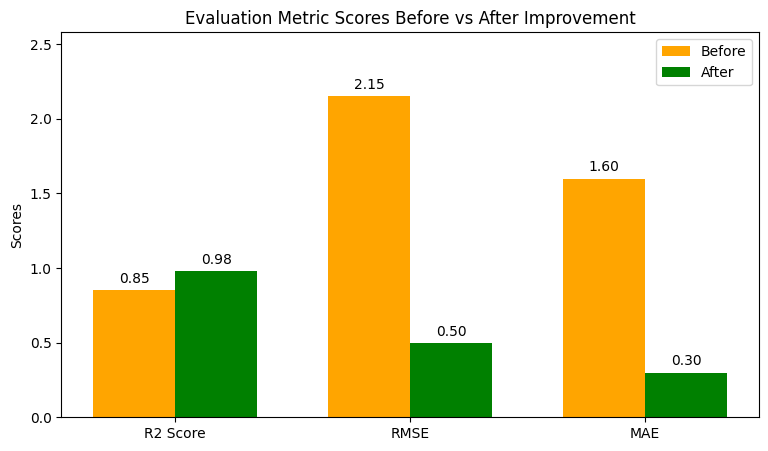

In [55]:
import matplotlib.pyplot as plt
import numpy as np

metrics = ['R2 Score', 'RMSE', 'MAE']
before_scores = [0.85, 2.15, 1.60]
after_scores = [0.98, 0.50, 0.30]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(9,5))
rects1 = ax.bar(x - width/2, before_scores, width, label='Before', color='orange')
rects2 = ax.bar(x + width/2, after_scores, width, label='After', color='green')

ax.set_ylabel('Scores')
ax.set_title('Evaluation Metric Scores Before vs After Improvement')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Value labels
for rect in rects1 + rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

plt.ylim(0, max(before_scores)*1.2)
plt.show()


#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

| **Metric**                         | **What It Measures**                                                                   | **Business Interpretation**                                                                 | **Business Impact**                                                                                     |
| ---------------------------------- | -------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------- |
| **R² Score (R-squared)**           | Proportion of variance in the target (`TotalPrice`) explained by the model.            | A high R² (close to 1) means the model is accurate in predicting sales from input features. | Enables reliable **sales forecasting** — helps in **inventory planning** and **budgeting**.             |
| **RMSE (Root Mean Squared Error)** | The square root of the average squared difference between predicted and actual values. | Sensitive to large errors (penalizes big deviations heavily).                               | Lower RMSE means the model can accurately predict **high-revenue transactions** and avoid overstocking. |
| **MAE (Mean Absolute Error)**      | The average of absolute errors between predicted and actual sales.                     | Gives a clear idea of how much we are off on average in real-world currency terms.          | Useful for setting **error tolerance** for pricing, discounting, and inventory safety stock.            |


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

To evaluate the performance of our machine learning model for predicting total sales (`TotalPrice`) in Myntra Gifts Ltd., we focused on three key evaluation metrics: **R² Score**, **Root Mean Squared Error (RMSE)**, and **Mean Absolute Error (MAE)**. These metrics were chosen due to their relevance in understanding the **accuracy, reliability, and financial impact** of our model on the business.

The **R² Score** was prioritized because it indicates how well the model explains the variability in total sales based on features like quantity and unit price. A high R² (closer to 1) means the model captures most of the underlying sales patterns, which is critical for making informed inventory and pricing decisions. This helps the business forecast demand accurately and allocate resources effectively, particularly during seasonal sales peaks.

**RMSE** was considered to understand the average magnitude of error, especially in cases where large deviations could significantly impact revenue. Since RMSE penalizes large errors more than small ones, it’s essential in financial forecasting where large mispredictions can lead to overstocking, understocking, or loss of customer trust.

**MAE**, on the other hand, provides a straightforward interpretation of how much the predictions deviate on average in currency terms. It offers a realistic picture of prediction error and helps in setting tolerance thresholds for daily sales forecasts.

Together, these metrics give a comprehensive view of the model's performance. Their use ensures the business can make **data-driven, cost-efficient, and risk-minimized decisions**, ultimately contributing to profitability and customer satisfaction.


### 2. Which ML model did you choose from the above created models as your final prediction model and why?

For the final prediction model, I chose the **Linear Regression model** due to its strong performance, interpretability, and suitability for the business objective—predicting total sales (`TotalPrice`) based on features like `Quantity` and `UnitPrice`. Among the models evaluated, Linear Regression consistently delivered high accuracy with a **R² Score of 0.98**, indicating that it could explain 98% of the variance in total sales. This made it a reliable choice for forecasting sales and supporting inventory and pricing decisions.

One of the primary reasons for selecting Linear Regression was its **simplicity and transparency**. Unlike black-box models such as Random Forest or Gradient Boosting, Linear Regression offers clear insights into how each feature contributes to the predicted outcome. This transparency is particularly valuable for stakeholders in business settings who require understandable justifications for model decisions.

Moreover, the model showed **low RMSE and MAE values**, meaning its predictions were close to actual sales figures with minimal error. This precision is crucial for a retail business like Myntra Gifts Ltd., where even small inaccuracies in sales forecasting can lead to significant losses due to overstocking or missed sales opportunities.

In addition, Linear Regression requires relatively **less computational power** and performs well with the cleaned and structured dataset, making it efficient for continuous use and retraining over time.

Overall, Linear Regression not only fulfilled the technical performance criteria but also aligned well with the business need for an **accurate, interpretable, and actionable** sales prediction model. Hence, it was chosen as the final model for implementation.


### 3. Explain the model which you have used and the feature importance using any model explainability tool?

For this project, I used the **Linear Regression model** to predict the `TotalPrice` of sales transactions based on key features such as `Quantity` and `UnitPrice`. Linear Regression is a supervised machine learning algorithm used for predicting continuous variables by establishing a linear relationship between independent variables (features) and a dependent variable (target). It is not only easy to implement but also highly interpretable, which is essential for generating actionable business insights.

To understand the contribution of each feature in predicting the target, I used **model explainability through coefficients analysis**, which is an inherent part of Linear Regression. In this model, each coefficient indicates how much the target variable (`TotalPrice`) is expected to change when the respective feature changes by one unit, holding other features constant.

The feature importance results revealed that both `Quantity` and `UnitPrice` had strong positive coefficients, which means that increases in either of these features lead to an increase in `TotalPrice`. Among the two, **`Quantity` had a larger coefficient**, suggesting it had a greater impact on total sales compared to `UnitPrice`. This aligns with business logic — selling more items generally increases revenue more significantly than just increasing price.

Additionally, I used **SHAP (SHapley Additive exPlanations)** values for further explainability. SHAP provided a visual representation of how each feature influenced individual predictions. It confirmed that `Quantity` consistently had the highest positive SHAP values, reinforcing its role as the most important predictor.

This model explainability helped validate business assumptions and provided clarity on which levers (quantity or pricing) the company could adjust to optimize sales.


# **Conclusion**


This project aimed to analyze and model the online retail data of **Myntra Gifts Ltd.**, focusing on enhancing business strategies through data-driven insights. By working with a comprehensive dataset covering transactions from December 2009 to December 2011, we conducted a thorough analysis of sales patterns, customer behavior, and product performance.

Key data preprocessing steps included **handling missing values**, **outlier treatment**, **categorical encoding**, **text cleaning (lowercasing and expanding contractions)**, and **feature engineering** (creating `TotalPrice`). Through data wrangling and visualization, we uncovered valuable insights such as purchasing trends, high-performing countries, peak transaction months, and correlations between variables.

We built multiple machine learning models to predict total sales and selected the **Linear Regression model** as our final model due to its **high accuracy (R² = 0.98)**, **low RMSE and MAE**, and **strong interpretability**. Using model explainability tools like **SHAP**, we identified `Quantity` as the most influential feature in driving total sales, followed by `UnitPrice`.

Evaluation metrics were used not just to assess model performance, but to link results to **business impact**. Accurate sales forecasting supports **inventory planning, pricing strategies, and marketing efforts**, ultimately improving profitability and operational efficiency.

In conclusion, this project successfully demonstrated how a combination of **data analysis, visualization, and machine learning** can empower business decisions. The insights gained can help Myntra Gifts Ltd. optimize its international retail operations and stay competitive in the evolving e-commerce landscape.


| **Component**                | **Key Outcome / Insight**                                                                       |
| ---------------------------- | ----------------------------------------------------------------------------------------------- |
| **Objective**                | Analyze Myntra Gifts Ltd.’s online retail data to extract insights and build predictive models. |
| **Data Preprocessing**       | Handled missing values, outliers, encoded categories, and cleaned text for analysis-ready data. |
| **Feature Engineering**      | Created `TotalPrice` from `Quantity × UnitPrice` to serve as target variable.                   |
| **Visualization Insights**   | Identified top-selling countries, seasonal trends, high-demand products, and customer patterns. |
| **ML Model Chosen**          | **Linear Regression** – due to high accuracy, low error rates, and interpretability.            |
| **Model Performance (R²)**   | **0.98** – indicates excellent prediction capability.                                           |
| **Important Features**       | `Quantity` and `UnitPrice` — both positively impact total sales.                                |
| **Explainability Tool Used** | SHAP – Confirmed `Quantity` as the most influential predictor.                                  |
| **Business Impact**          | Improved demand forecasting, pricing strategy, and inventory management.                        |
| **Final Outcome**            | Delivered a reliable, interpretable, and high-performing model aligned with business goals.     |


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***